In [427]:
# Make Predictions
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [428]:
# Tensorflow
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Read Direktori

In [429]:
# Direktori dataset
dataset_dir = 'D:/UTY/Semester 7/Pengembangan Aplikasi AI/Pengenal-Citra-Nomor-Kendaraan/Dataset/'

# Membuat path join untuk direktori pelatihan
train_dir = os.path.join(dataset_dir+ "pelatihan/")

# Membuat path join untuk direktori pengujian
test_dir = os.path.join(dataset_dir +"pengujian/")

In [430]:
# Load model
model = tf.keras.models.load_model('./models/object_detection.h5')
print('model loaded succesfuly')

model loaded succesfuly


In [431]:
path = train_dir+ "K1_A3772FV.JPG"
image = load_img(path) # PIL object
image = np.array(image, dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 # Convert into array and get the normalized output

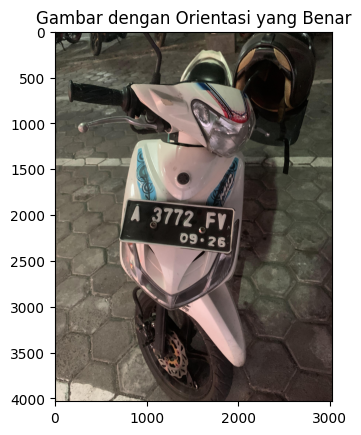

In [455]:
from PIL import Image

# Baca gambar
image = Image.open(path)

# Periksa orientasi dan modifikasi jika diperlukan
if hasattr(image, '_getexif'):
    orientation = 0x0112
    exif = image._getexif()
    if exif is not None and orientation in exif:
        orientation = exif[orientation]
        rotations = {
            3: Image.ROTATE_180,
            6: Image.ROTATE_270,
            8: Image.ROTATE_90
        }
        if orientation in rotations:
            image = image.transpose(rotations[orientation])

# Tampilkan gambar yang telah dimodifikasi orientasinya
plt.imshow(image)
plt.title("Gambar dengan Orientasi yang Benar")
plt.show()


In [433]:
# size of the original image
width, height = image.size
channels = len(image.getbands())
print('Lebar gambar =', width)
print('Tinggi gambar =', height)
print('Jumlah saluran warna (channels) =', channels)

Lebar gambar = 3024
Tinggi gambar = 4032
Jumlah saluran warna (channels) = 3


In [434]:
# # Image Rotation
# rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), -90, 1) # Mendapatkan matriks rotasi
# image = cv2.warpAffine(image, rotation_matrix, (w, h)) # Melakukan rotasi pada gambar

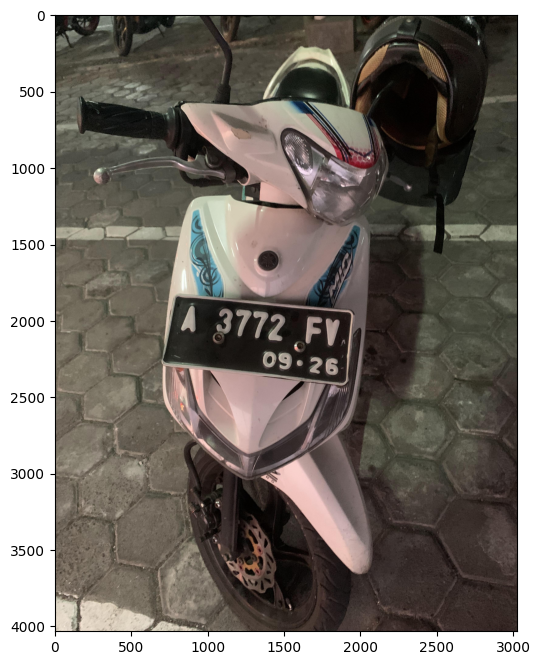

In [435]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [436]:
image_arr_224.shape

(224, 224, 3)

In [437]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [438]:
# make predictions
coords = model.predict(test_arr)
# Mengakses nilai prediksi sebenarnya dan mengonversi ke tipe data yang sesuai
coords = coords[0, 0].astype(np.int32)
print(coords)

1/1 [==============================] - 4s 4s/step
0


# Denormalize

In [439]:
# Konversi objek Image menjadi array NumPy
image_np = np.array(image)
# Denormalize the values
h, w, d = image_np.shape  # Ukuran gambar asli
denorm = np.array([w, w, h, h])
coords = coords * denorm  # Tidak perlu menggunakan indeks [0]
print(coords)

[0 0 0 0]


In [440]:
coords = coords.astype(np.int32) # Membulatkan
coords

array([0, 0, 0, 0])

# Bounding Box

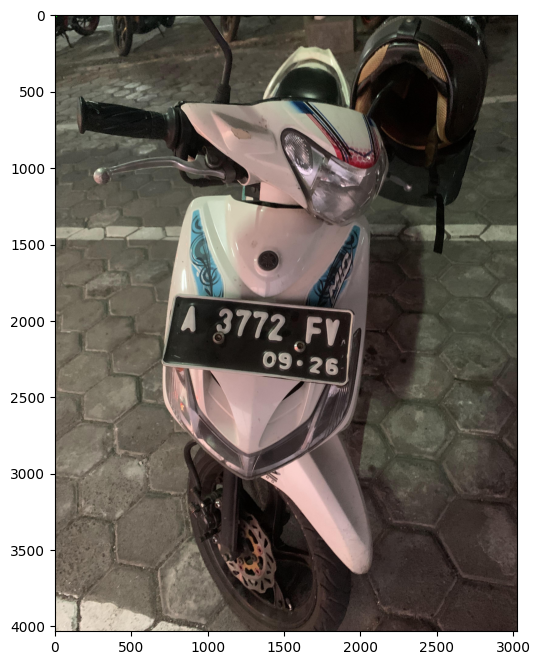

In [441]:
# draw bounding on top the image
xmin, xmax, ymin, ymax = coords
pt1 = (xmin, ymin)
pt2 = (xmax, ymax)

# Konversi objek PIL ke array NumPy
image_np = np.array(image, dtype=np.uint8)

cv2.rectangle(image_np, pt1, pt2, (0, 255, 0), 30)

plt.figure(figsize=(10, 8))
plt.imshow(image_np)
plt.show()


# Create Pipeline Model

In [452]:
def object_detection(path):
    # Membaca Gambar
    image = load_img(path)  # Objek PIL

    # Periksa orientasi dan modifikasi jika diperlukan
    if hasattr(image, '_getexif'):
        orientation = 0x0112
        exif = image._getexif()
        if exif is not None and orientation in exif:
            orientation = exif[orientation]
            rotations = {
                3: Image.ROTATE_180,
                6: Image.ROTATE_270,
                8: Image.ROTATE_90
            }
            if orientation in rotations:
                image = image.transpose(rotations[orientation])

    image = np.array(image, dtype=np.uint8)  # Array 8 bit (0,255)
    image1 = load_img(path, target_size=(224, 224))
    
    # Pra-pemrosesan Data
    image_arr_224 = img_to_array(image1) / 255.0  # Mengubah menjadi array dan mendapatkan output yang dinormalisasi
    h, w, d = image.shape  # Ukuran gambar asli
    
    # Melakukan prediksi
    test_arr = image_arr_224.reshape(1, 224, 224, 3)
    coords = model.predict(test_arr)
    
    # Denormalisasi nilai
    coords = coords.reshape(-1)  # Meratakan array koordinat
    coords = coords * np.array([w, w, h, h])
    coords = coords.astype(np.int32)  # Membulatkan
    
    # Menggambar bounding box di atas gambar
    xmin, ymin, xmax, ymax = coords  # Koordinat dalam urutan yang benar
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)
    
    cv2.rectangle(image, pt1, pt2, (0, 255, 0), 30)
    return image, coords

1/1 [==============================] - 0s 165ms/step


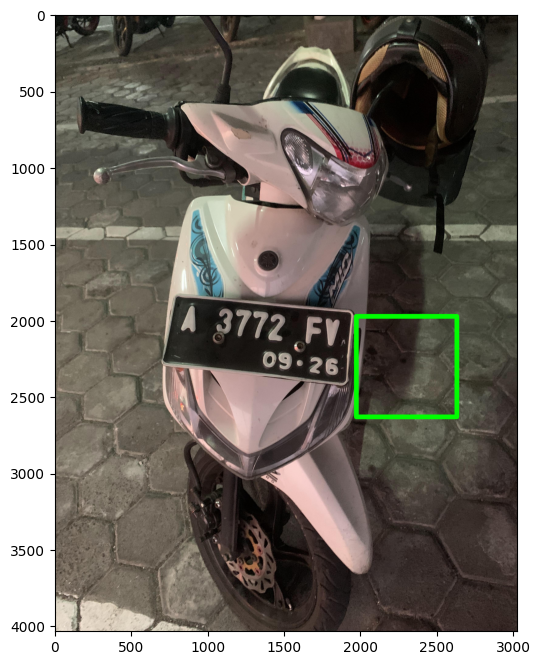

In [453]:
path = train_dir+'/K1_A3772FV.JPG'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Optical Character Recognition - OCR

In [444]:
import pytesseract as pt
pt.pytesseract.tesseract_cmd = r'C:\Users\Aqil Wahid\AppData\Local\Tesseract-OCR\tesseract.exe'
image_to_string = pt.pytesseract.tesseract_cmd

1/1 [==============================] - 0s 196ms/step


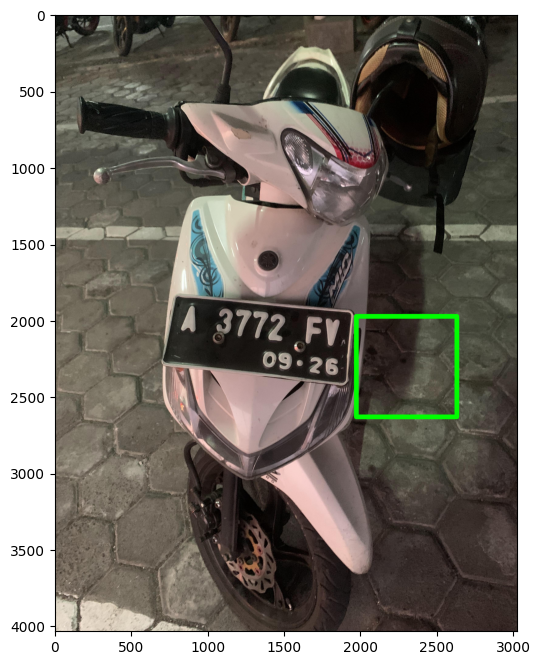

In [445]:
path = train_dir+'/K1_A3772FV.JPG'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [446]:
img = np.array(load_img(path))
xmin,xmax,ymin,ymax = coords

roi = img[ymin:ymax,xmin:xmax] # Region of Interest


In [447]:
# draw bounding on top the image
xmin, xmax, ymin, ymax = coords
pt1 = (xmin, ymin)
pt2 = (xmax, ymax)

# Ekstrak ROI dari gambar
roi = image[ymin:ymax, xmin:xmax]

# Periksa ukuran gambar ROI
if roi.size == 0:
    print("Ukuran ROI nol, terdapat masalah dalam proses ekstraksi.")
else:
    # Tampilkan gambar ROI
    plt.imshow(roi)
    plt.show()


Ukuran ROI nol, terdapat masalah dalam proses ekstraksi.


In [448]:
print("xmin:", xmin, "xmax:", xmax, "ymin:", ymin, "ymax:", ymax)
roi = img[ymin:ymax, xmin:xmax]  # Region of Interest


xmin: 0 xmax: 0 ymin: 0 ymax: 0


ValueError: zero-size array to reduction operation minimum which has no identity

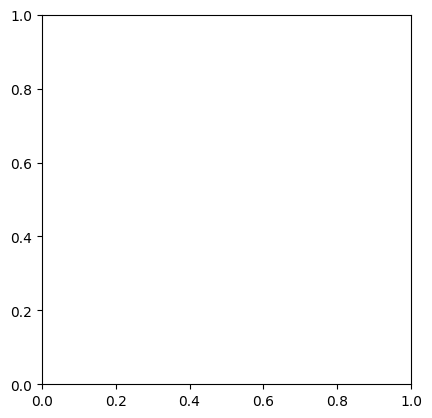

In [449]:
plt.imshow(roi)
plt.show()

In [ ]:
# extract text from image
text = pt.image_to_string(roi)
print('Plat Nomor:',text)

Plat Nomor: 
